# The DataFrame

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import numpy as np
import catboost as cb


In [5]:
df = pd.DataFrame(
    {
        'Name': ['Marvin', 'Buster', 'Calvin', 'Arnold', 'Vincent'],
        'Country': ['USA', 'GHA', 'NIG', 'RWA', 'RSA'],
        'Growth': [1.2, 1.5, 2.1, 2.5, 2.9]
    }
                )

df.head()

,Name,Country,Growth
0,Marvin,USA,1.2
1,Buster,GHA,1.5
2,Calvin,NIG,2.1
3,Arnold,RWA,2.5
4,Vincent,RSA,2.9


In [6]:
df.sort_values(by='Growth')

,Name,Country,Growth
0,Marvin,USA,1.2
1,Buster,GHA,1.5
2,Calvin,NIG,2.1
3,Arnold,RWA,2.5
4,Vincent,RSA,2.9


In [7]:
# Accessing rows
df.iloc[2:4]


,Name,Country,Growth
2,Calvin,NIG,2.1
3,Arnold,RWA,2.5


In [8]:
df['Name'].str.upper()

0     MARVIN
1     BUSTER
2     CALVIN
3     ARNOLD
4    VINCENT
Name: Name, dtype: object

> This is an object data type and used to store string types usually.

In [9]:
df['Name'].str.lower()

0     marvin
1     buster
2     calvin
3     arnold
4    vincent
Name: Name, dtype: object

## Construction

- columns (dicts of lists)
- rows (list of dicts)
- CSV files (pd.read_csv)
- NumPy ndarrays
- other: SQL, HDF5, arrow, etc
- URL

> After parsing the CSV file, pandas makes a best-effort to give a type to each column. A ”besteffort”
means it will convert numerics to int64 if the column is whole numbers and not missing
values. Other numeric columns are converted to float64 (if they have decimals or are missing
values). If there are non-numeric values, pandas will use the object type. Usually object means
that the column has string type data, though it might be mixed-typed column that has string data
and nan values stored as floats.

In [10]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/siena2018-pres.csv'

pres_dfs = pd.read_csv(url)

pres_dfs.head()

,Unnamed: 0,Seq.,President,Party,Bg,Im,Int,IQ,L,WR,...,PL,RC,CAp,HE,EAp,DA,FPA,AM,EV,O
0,1,1,George Washington,Independent,7,7,1,10,1,6,...,18,1,1,1,1,2,2,1,2,1
1,2,2,John Adams,Federalist,3,13,4,4,24,14,...,28,17,4,13,15,19,13,16,10,14
2,3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,...,5,5,7,20,4,6,9,7,5,5
3,4,4,James Madison,Democratic-Republican,4,6,7,3,16,15,...,9,10,6,14,7,11,19,11,8,7
4,5,5,James Monroe,Democratic-Republican,9,14,11,18,6,16,...,12,8,11,9,9,10,5,6,9,8


Data Dictionary of US Presidents data
- Bg = Background
- Im = Imagination
- Int = Integrity
- IQ = Intelligence
- L = Luck
- WR = Willing to take risks
- AC = Ability to compromise
- EAb = Executive ability
- LA = Leadership ability
- CAb = Communication ability
- OA = Overall ability
- PL = Party leadership
- RC = Relations with Congress
- CAp = Court appointments
- HE = Handling of economy
- EAp = Executive appointments
- DA = Domestic accomplishments
- FPA = Foreign policy accomplishments
- AM = Avoid crucial mistakes
- EV = Experts’ view
- O = Overall

In [11]:
# Check the types
pres_dfs.dtypes

Unnamed: 0     int64
Seq.          object
President     object
Party         object
Bg             int64
Im             int64
Int            int64
IQ             int64
L              int64
WR             int64
AC             int64
EAb            int64
LA             int64
CAb            int64
OA             int64
PL             int64
RC             int64
CAp            int64
HE             int64
EAp            int64
DA             int64
FPA            int64
AM             int64
EV             int64
O              int64
dtype: object

In [12]:
# Check the Dataset
pres_dfs.describe()

,Unnamed: 0,Bg,Im,Int,IQ,L,WR,AC,EAb,LA,...,PL,RC,CAp,HE,EAp,DA,FPA,AM,EV,O
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,22.500000,22.000000,21.750000,22.500000,22.500000,22.500000,21.659091,22.000000,22.227273,22.500000,...,22.500000,22.250000,22.500000,22.500000,22.500000,22.500000,22.500000,22.500000,22.500000,22.500000
std,12.845233,12.409674,12.519984,12.845233,12.845233,12.845233,11.892822,12.409674,12.500909,12.845233,...,12.845233,12.519984,12.845233,12.845233,12.845233,12.845233,12.845233,12.845233,12.845233,12.845233
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,11.750000,11.750000,11.000000,11.750000,11.750000,11.750000,11.750000,11.750000,11.750000,11.750000,...,11.750000,11.750000,11.750000,11.750000,11.750000,11.750000,11.750000,11.750000,11.750000,11.750000
50%,22.500000,22.000000,21.500000,22.500000,22.500000,22.500000,22.500000,22.000000,22.500000,22.500000,...,22.500000,22.500000,22.500000,22.500000,22.500000,22.500000,22.500000,22.500000,22.500000,22.500000
75%,33.250000,32.250000,32.250000,33.250000,33.250000,33.250000,31.250000,32.250000,32.250000,33.250000,...,33.250000,33.000000,33.250000,33.250000,33.250000,33.250000,33.250000,33.250000,33.250000,33.250000
max,44.000000,43.000000,43.000000,44.000000,44.000000,44.000000,41.000000,43.000000,43.000000,44.000000,...,44.000000,43.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000


In [13]:
def tweak_siena_pres(df):
    def int64_to_uint8(df_):
        cols = df_.select_dtypes('int64')
        return (df_.astype({col:'uint8' for col in cols}))
    return (
    df    
    # Rename the columns
    .rename(columns={'Seq.': 'Seq'})
    .rename(columns={k:v.replace(' ', '_') for k, v in 
            {
                'Bg': 'Background',
                'PL': 'Party leadership', 
                'CAb': 'Communication ability',
                'RC': 'Relations with Congress', 
                'CAp': 'Court appointments',
                'HE': 'Handling of economy', 
                'L': 'Luck',
                'AC': 'Ability to compromise', 
                'WR': 'Willing to take risks',
                'EAp': 'Executive appointments', 
                'OA': 'Overall ability',
                'Im': 'Imagination', 
                'DA': 'Domestic accomplishments',
                'Int': 'Integrity', 
                'EAb': 'Executive ability',
                'FPA': 'Foreign policy accomplishments',
                'LA': 'Leadership ability',
                'IQ': 'Intelligence', 
                'AM': 'Avoid crucial mistakes',
                'EV': "Experts' view", 
                'O': 'Overall'}.items()
            })
    .astype({'Party':'category'})
    .pipe(int64_to_uint8)
    .assign(Average_rank = lambda df_:(df_.select_dtypes('uint8')
                .sum(axis=1).rank(method='dense').astype('uint8')),
                Quartile=lambda df_:pd.qcut(df_.Average_rank, 4, labels ='1st 2nd 3rd 4th'.split())
            )

)

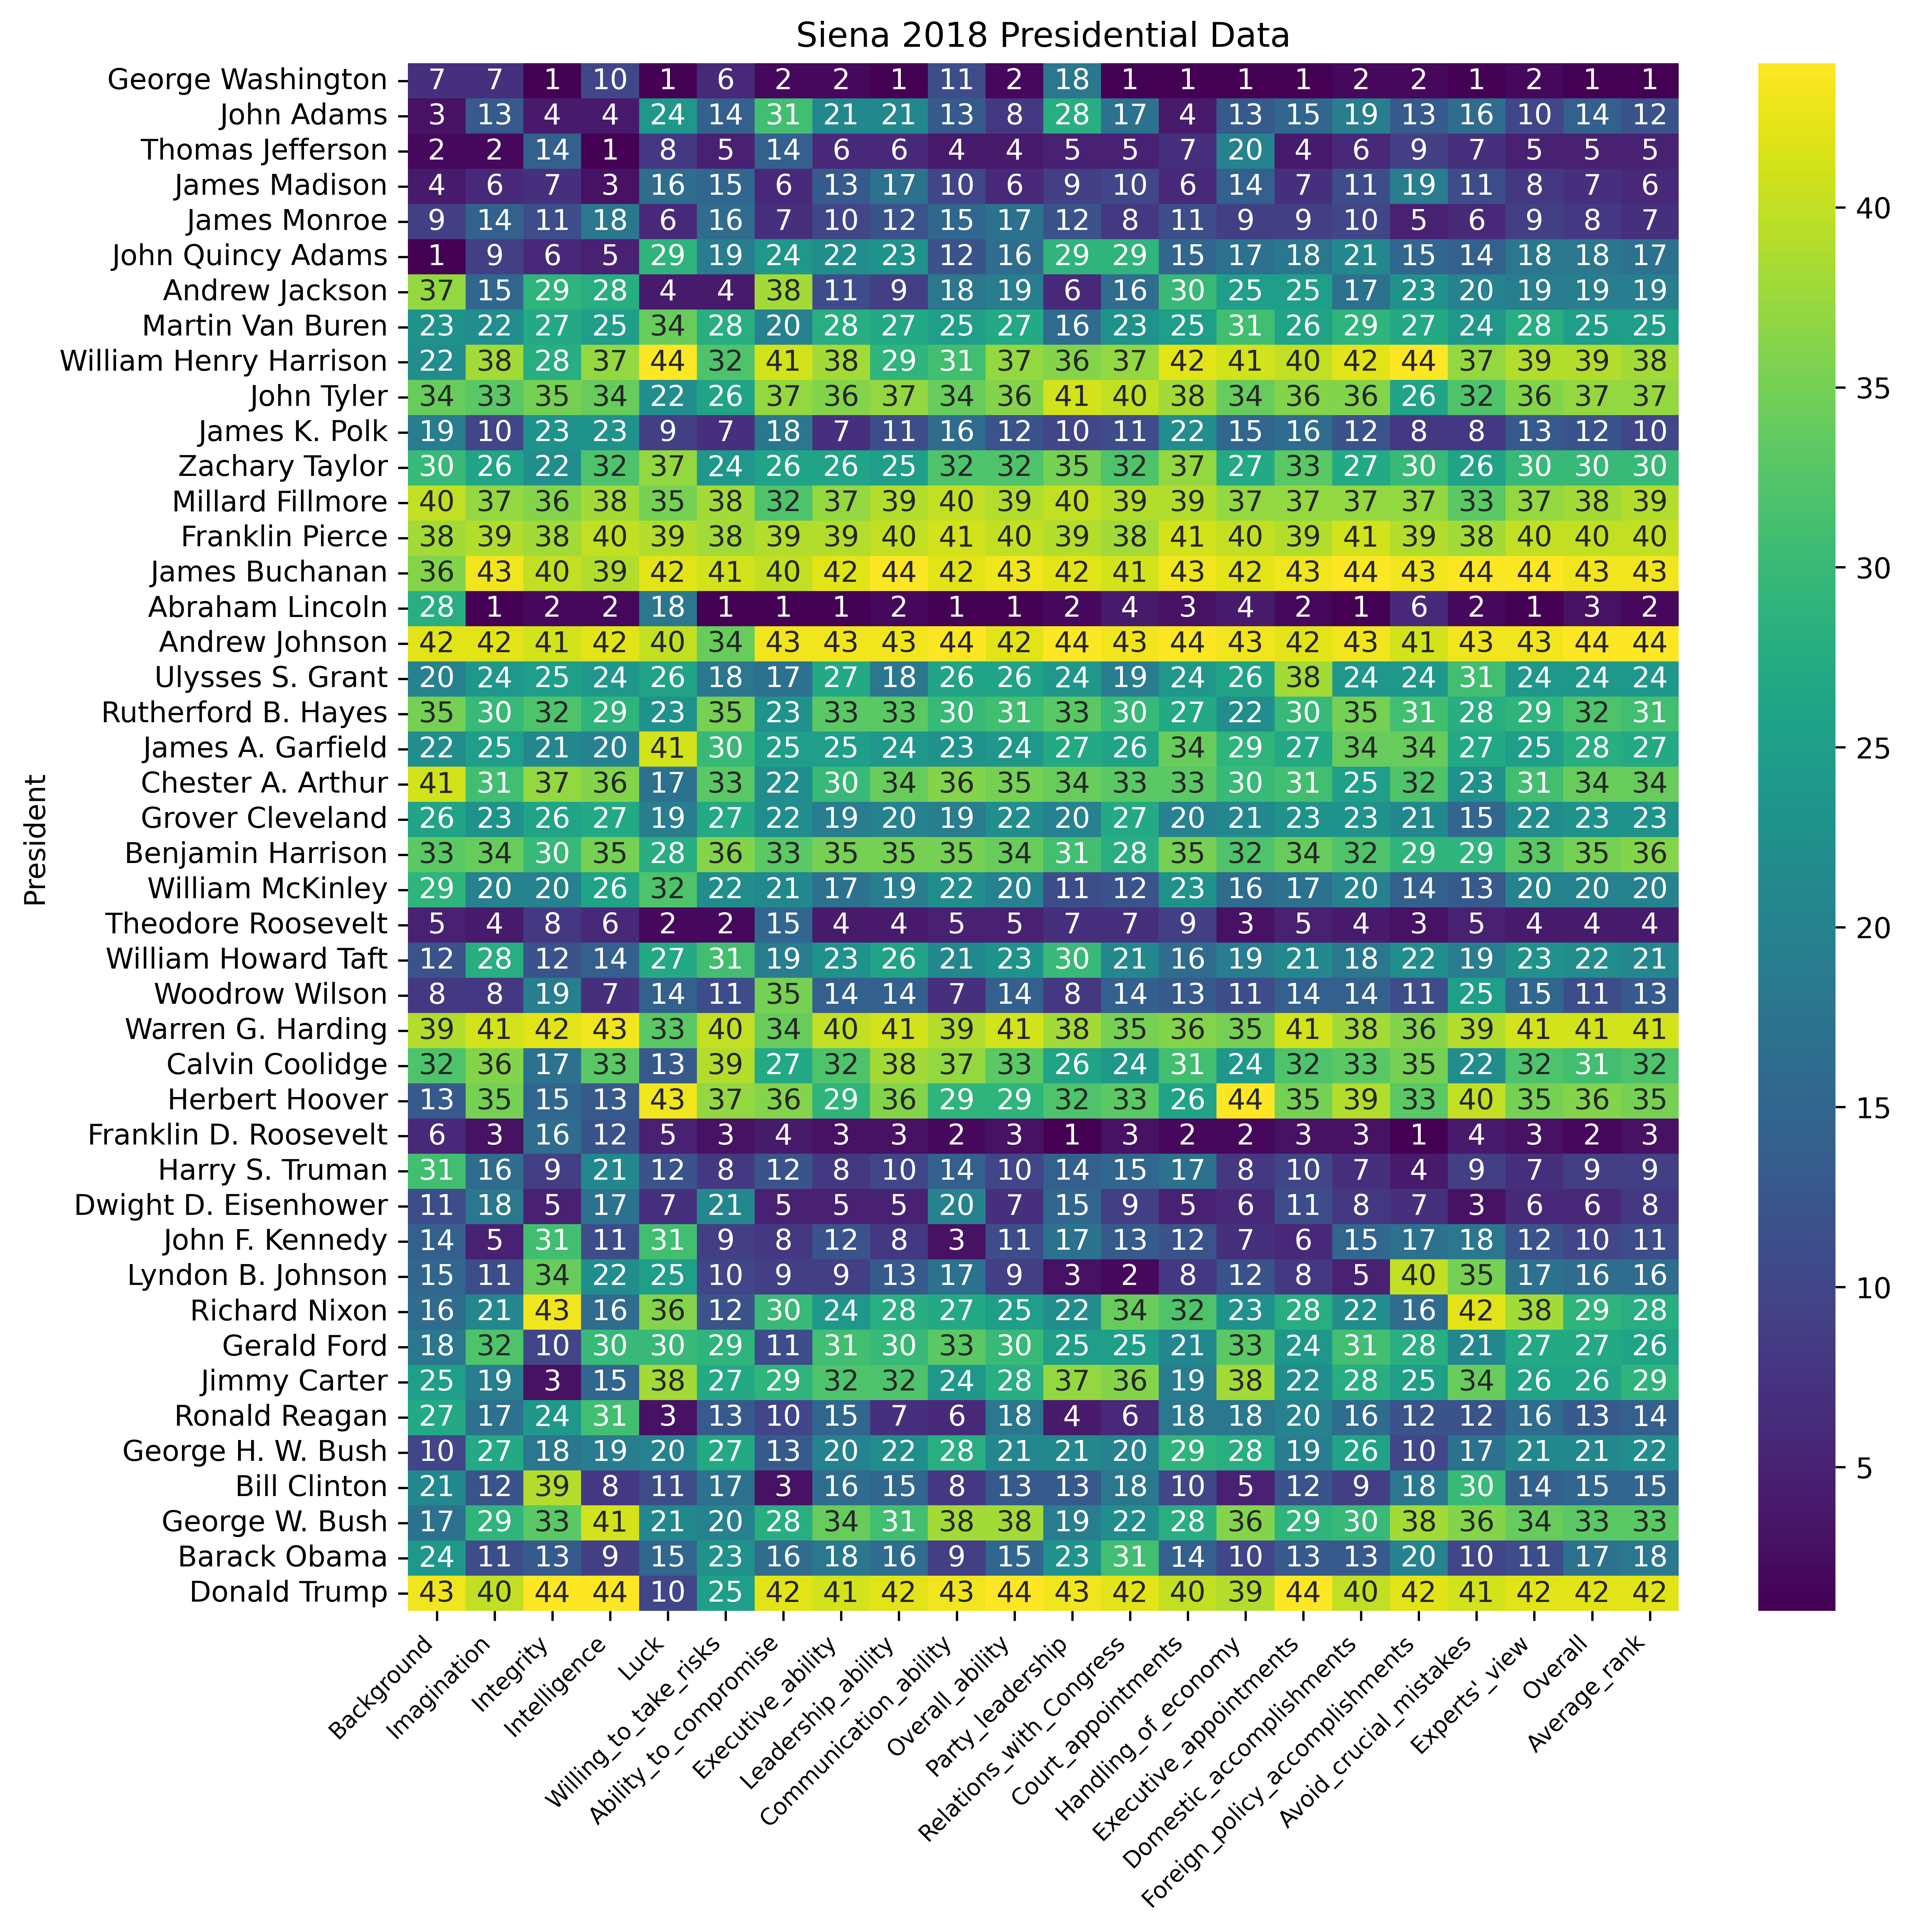

In [14]:
fig , ax = plt.subplots(figsize =(10 ,10) , dpi =600)

g = sns.heatmap((tweak_siena_pres(pres_dfs)
                 .set_index('President')
                 .iloc[ : , 3:-1]
                 ),
                annot=True, cmap='viridis', ax=ax)

g.set_xticklabels(g.get_xticklabels(), rotation=45, fontsize=8, ha='right')

_ = plt.title('Siena 2018 Presidential Data')

## Looping

In [15]:
df = tweak_siena_pres(pres_dfs)


In [16]:
# Iteration over columns (col_name, series) tuple

for col_name, col_values in df.iteritems():
    print(col_name, type(col_values))
    break

Unnamed: 0 <class 'pandas.core.series.Series'>


In [17]:
# Iteration over rows (index, row(as a series)) tuple
for idx, row in df.iterrows():
    print(idx, type(row))
    break

0 <class 'pandas.core.series.Series'>


In [18]:
# iteration over rows as namedtuple (index as first item)
for tup in df.itertuples():
    print(tup[0], tup.President, tup.Party)
    break

0 George Washington Independent


## Aggregations



In [19]:
scores = df.loc[:, 'Background':'Average_rank']


scores.head()

,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,Executive_ability,Leadership_ability,Communication_ability,...,Relations_with_Congress,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank
0,7,7,1,10,1,6,2,2,1,11,...,1,1,1,1,2,2,1,2,1,1
1,3,13,4,4,24,14,31,21,21,13,...,17,4,13,15,19,13,16,10,14,12
2,2,2,14,1,8,5,14,6,6,4,...,5,7,20,4,6,9,7,5,5,5
3,4,6,7,3,16,15,6,13,17,10,...,10,6,14,7,11,19,11,8,7,6
4,9,14,11,18,6,16,7,10,12,15,...,8,11,9,9,10,5,6,9,8,7


In [20]:
scores.sum(axis=1) / len(scores.columns)

0      3.681818
1     14.409091
2      6.545455
3      9.590909
4     10.409091
5     17.136364
6     19.590909
7     25.681818
8     36.909091
9     34.409091
10    13.272727
11    29.500000
12    37.454545
13    39.363636
14    42.000000
15     4.000000
16    42.272727
17    24.227273
18    30.090909
19    27.181818
20    31.454545
21    22.181818
22    32.818182
23    19.727273
24     5.227273
25    21.272727
26    13.636364
27    38.818182
28    29.954545
29    31.954545
30     3.954545
31    11.818182
32     9.318182
33    12.772727
34    15.272727
35    26.909091
36    26.000000
37    26.909091
38    14.545455
39    20.863636
40    14.636364
41    30.363636
42    15.863636
43    39.772727
dtype: float64

In [21]:
df.agg(['mean', 'max', 'min', 'std'])[['Background', 'Average_rank']]

C:\Users\INNO\AppData\Local\Temp\ipykernel_35908\4061406844.py:1: FutureWarning: ['Seq', 'President', 'Party', 'Quartile'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.agg(['mean', 'max', 'min', 'std'])[['Background', 'Average_rank']]


,Background,Average_rank
mean,22.000000,22.500000
max,43.000000,44.000000
min,1.000000,1.000000
std,12.409674,12.845233


In [22]:
df.agg({'Background':['mean', 'max'], 'Average_rank':['max', 'count']})

,Background,Average_rank
mean,22.0,NaN
max,43.0,44.0
count,NaN,44.0


In [23]:
(
    df
    # Select numeric columns
    .select_dtypes('number')
    # Row-wise calculation of range
    .pipe(lambda df_: df_.max(axis='columns') - df_.min(axis='columns'))
)

0     17
1     29
2     19
3     16
4     13
5     28
6     34
7     26
8     35
9     31
10    16
11    25
12    27
13    27
14    29
15    27
16    27
17    21
18    16
19    21
20    24
21    12
22    13
23    21
24    23
25    19
26    28
27    15
28    26
29    31
30    30
31    28
32    30
33    31
34    38
35    31
36    27
37    35
38    36
39    30
40    38
41    25
42    34
43    34
dtype: uint8

## Creating and Updating Columns

In [24]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/2020-jetbrains-python-survey.csv'

jb = pd.read_csv(url)

jb.head()

C:\Users\INNO\AppData\Local\Temp\ipykernel_35908\3882704795.py:3: DtypeWarning: Columns (152) have mixed types. Specify dtype option on import or set low_memory=False.
  jb = pd.read_csv(url)


,is.python.main,other.lang.None,other.lang.Java,other.lang.JavaScript,other.lang.C/C++,other.lang.PHP,other.lang.C#,other.lang.Ruby,other.lang.Bash / Shell,other.lang.Objective-C,...,job.role.Technical support,job.role.Data analyst,job.role.Business analyst,job.role.Team lead,job.role.Product manager,job.role.CIO / CEO / CTO,job.role.Systems analyst,job.role.Other,age,country.live
0,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bash / Shell,NaN,...,NaN,NaN,Business analyst,NaN,NaN,NaN,NaN,NaN,30–39,NaN
1,Yes,NaN,Java,JavaScript,NaN,NaN,C#,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21–29,India
2,Yes,NaN,NaN,NaN,C/C++,NaN,NaN,NaN,Bash / Shell,NaN,...,Technical support,Data analyst,NaN,Team lead,NaN,NaN,NaN,NaN,30–39,United States
3,Yes,NaN,NaN,JavaScript,NaN,NaN,NaN,NaN,Bash / Shell,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Yes,NaN,Java,JavaScript,C/C++,NaN,NaN,NaN,Bash / Shell,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21–29,Italy


In [25]:
counter = collections.defaultdict(list)

for col in sorted(jb.columns):
    period_count = col.count('.')
    if period_count >= 2:
        part_end = 2
        
    else:
        part_end = 1
        
    parts = col.split('.')[:part_end]
    counter['.'.join(parts)].append(col)
    
uniq_cols = []

for cols in counter.values():
    uniq_cols.extend(cols)
    
uniq_cols

['age',
 'are.you.datascientist',
 'bigdata.Apache Beam',
 'bigdata.Apache Flink',
 'bigdata.Apache Hadoop/MapReduce',
 'bigdata.Apache Hive',
 'bigdata.Apache Kafka',
 'bigdata.Apache Samza',
 'bigdata.Apache Spark',
 'bigdata.Apache Tez',
 'bigdata.ClickHouse',
 'bigdata.Dask',
 'bigdata.None',
 'bigdata.Other',
 'ci.AppVeyor',
 'ci.Bamboo',
 'ci.CircleCI',
 'ci.CruiseControl',
 'ci.Gitlab CI',
 'ci.Jenkins / Hudson',
 'ci.None',
 'ci.Other',
 'ci.TeamCity',
 'ci.Travis CI',
 'cloud.platform.AWS',
 'cloud.platform.DigitalOcean',
 'cloud.platform.Google Cloud Platform',
 'cloud.platform.Heroku',
 'cloud.platform.Linode',
 'cloud.platform.Microsoft Azure',
 'cloud.platform.None',
 'cloud.platform.OpenShift',
 'cloud.platform.OpenStack',
 'cloud.platform.Other',
 'cloud.platform.PythonAnywhere',
 'cloud.platform.Rackspace',
 'company.size',
 'configuration.management.Ansible',
 'configuration.management.Chef',
 'configuration.management.Custom solution',
 'configuration.management.None'

In [26]:
# A function for getting the unique columns

def get_uniq_cols(jb):
    
    counter = collections.defaultdict(list)

    for col in sorted(jb.columns):
        period_count = col.count('.')
        if period_count >= 2:
            part_end = 2
        
        else:
            part_end = 1
        
        parts = col.split('.')[:part_end]
        counter['.'.join(parts)].append(col)
    
    uniq_cols = []

    for cols in counter.values():
        uniq_cols.extend(cols)
    
    return uniq_cols

In [27]:
(
    jb
    [uniq_cols]
    .rename(columns = lambda col: col.replace('.', '_'))
    ['age']
    .value_counts(dropna=False)
)

NaN            29701
21–29           9710
30–39           7512
40–49           3010
18–20           2567
50–59           1374
60 or older      588
Name: age, dtype: int64

In [28]:
jb['company.size'].value_counts(dropna=False)

NaN                35037
51–500              4608
More than 5,000     3635
11–50               3507
2–10                2558
1,001–5,000         1934
Just me             1492
501–1,000           1165
Not sure             526
Name: company.size, dtype: int64

In [29]:
jb_2 = (
    jb
    [uniq_cols]
    .rename(columns = lambda col: col.replace('.', '_'))
    .assign(age = lambda df_: df_['age']
                    # Grab the first two numbers in each column
                    .str[0:2]
                    # Convert to float then to the nullable integer
                    .astype('float')
                    .astype('Int64'),
            are_you_datascientist = lambda df_: df_['are_you_datascientist'].replace({'Yes':True, 'No':False, np.nan: 'False'}),
            company_size = lambda df_ : df_['company_size'].replace({'Just me': 1, 'Not sure': np.nan, 'More than 5,000': 5000, '2–10': 2, '11–50': 11, '51–500': 51, '501–1,000': 501,
                                                     '1,001–5,000': 1001}).astype('Int64'),
            # country_live - Convert to categorical.
            country_live = lambda df_: df_['country_live'].astype('category'),
            # employment_status - Fill missing values with 'Other' and convert to categorical.
            employment_status = lambda df_: df_['employment_status'].fillna('Other').astype('category'),
            # is_python_main - Convert to categorical.
            is_python_main = lambda df_: df_['is_python_main'].astype('category'),
            # team_size - Split on en-dash, pull out the first column, replace 'More than 40' with 41, replace
            # values where company_size is NOT 1 with 1, and convert it to a float.
            team_size = lambda df_: df_['team_size'].str.split(r'-', n=1, expand=True)
                                    .iloc[:, 0].replace('More than 40 people', 41)
                                    .where(df_['company_size'] !=1, 1).astype(float),
            # years_of_coding - Replace 'Less than 1 year' with .5, then pull out any numbers with a regular
            # expression, and convert them to floats.
            years_of_coding = lambda df_: df_['years_of_coding']
                                .replace('Less than 1 year ', .5).str.extract(r'(\d+)')
                                .astype('float'),
            # python_years - Replace '_' with '.', then pull out any numbers with a regular expression, and
            # convert them to floats.
            python_years = lambda df_: df_['python_years']
                                        .replace('Less than 1 year ', .5).str.extract(r'(\d+)').astype(float),
            python3_ver = lambda df_: df_['python3_version_most']
                                        .str.replace('_', '.').str.extract(r'(\d\.\d)').astype(float),
            # use_python_most - Replace missing values with 'Unknown'.
            use_python_most = lambda df_: df_['use_python_most'].fillna('Unknown')       
    )
    # Drop the python 2 column
    .drop(columns=['python2_version_most'])
)

In [38]:
def tweak_jb(jb):
    uniq_cols = get_uniq_cols(jb)
    return(
          jb
    [uniq_cols]
    .rename(columns = lambda col: col.replace('.', '_'))
    .assign(age = lambda df_: df_['age']
                    # Grab the first two numbers in each column
                    .str[0:2]
                    # Convert to float then to the nullable integer
                    .astype('float')
                    .astype('Int64'),
            are_you_datascientist = lambda df_: df_['are_you_datascientist'].replace({'Yes':True, 'No':False, np.nan: 'False'}),
            company_size = lambda df_ : df_['company_size'].replace({'Just me': 1, 'Not sure': np.nan, 'More than 5,000': 5000, '2–10': 2, '11–50': 11, '51–500': 51, '501–1,000': 501,
                                                     '1,001–5,000': 1001}).astype('Int64'),
            # country_live - Convert to categorical.
            country_live = lambda df_: df_['country_live'].astype('category'),
            # employment_status - Fill missing values with 'Other' and convert to categorical.
            employment_status = lambda df_: df_['employment_status'].fillna('Other').astype('category'),
            # is_python_main - Convert to categorical.
            is_python_main = lambda df_: df_['is_python_main'].astype('category'),
            # team_size - Split on en-dash, pull out the first column, replace 'More than 40' with 41, replace
            # values where company_size is NOT 1 with 1, and convert it to a float.
            team_size = lambda df_: df_['team_size'].str.split(r'-', n=1, expand=True)
                                    .iloc[:, 0].replace('More than 40 people', 41)
                                    .where(df_['company_size'] !=1, 1).astype(float),
            # years_of_coding - Replace 'Less than 1 year' with .5, then pull out any numbers with a regular
            # expression, and convert them to floats.
            years_of_coding = lambda df_: df_['years_of_coding']
                                .replace('Less than 1 year ', .5).str.extract(r'(\d+)')
                                .astype('float'),
            # python_years - Replace '_' with '.', then pull out any numbers with a regular expression, and
            # convert them to floats.
            python_years = lambda df_: df_['python_years']
                                        .replace('Less than 1 year ', .5).str.extract(r'(\d+)').astype(float),
            python3_ver = lambda df_: df_['python3_version_most']
                                        .str.replace('_', '.').str.extract(r'(\d\.\d)').astype(float),
            # use_python_most - Replace missing values with 'Unknown'.
            use_python_most = lambda df_: df_['use_python_most'].fillna('Unknown')       
    )
    # Drop the python 2 column
    .drop(columns=['python2_version_most'])
        )
        

In [30]:
(
    jb_2
    # Grab missing values in team_size
    .query('team_size.isna()')
    # Grab the employment status column
    ['employment_status']
    # Get the value count
    .value_counts(dropna=False)
)

Fully employed by a company / organization                                                        5279
Working student                                                                                    696
Partially employed by a company / organization                                                     482
Self-employed (a person earning income directly from one's own business, trade, or profession)     430
Freelancer (a person pursuing a profession without a long-term commitment to any one employer)       0
Other                                                                                                0
Retired                                                                                              0
Student                                                                                              0
Name: employment_status, dtype: int64

## Dealing with Missing Values with catboost

I will train a model on all the rows where team_size is not missing and using the
trained model to predict the missing values. You may wish to use a simpler method like `.fillna`
to impute these missing values.

In [32]:
def prep_for_ml(df):
    # Remove pandas type
    return (df
        .assign(**{col: df[col].astype('float') for col in df.select_dtypes('number')},
                **{col: df[col].astype(str).fillna('') for col in df.select_dtypes(['object', 'category'])})
                )

In [37]:
jb_2.dtypes

age                                  Int64
are_you_datascientist               object
bigdata_Apache Beam                 object
bigdata_Apache Flink                object
bigdata_Apache Hadoop/MapReduce     object
                                    ...   
web_frameworks_Pyramid              object
web_frameworks_Tornado              object
web_frameworks_web2py               object
years_of_coding                    float64
python3_ver                        float64
Length: 264, dtype: object

In [ ]:
def predict_col(df, col):
    df = prep_for_ml(df)
    # Filter the df with entries of real data
    missing = df.query(f'~{col}.isna()')
    # Select the columns with obj data types
    cat_idx = [i for i, typ in enumerate(df.drop(columns=[col]).dtypes)
               if str(typ) == 'object']
    X = (
        missing.drop(columns=[col])
        .values
        )
    y = missing[col]
    model = cb.CatBoostRegressor(iterations=20, cat_features=cat_idx)
    # Fit a model to predict the team size
    model.fit(X, y, cat_features=cat_idx)
    # Predict the missing values for teamsize
    pred = model.predict(df.drop(columns=[col]))
    # Replace the missing values with the predicted values
    return df[col].where(~df[col].isna(), pred)

## More on dealing with Missing Data

If you are doing analysis or creating machine learning models on your data, you will
want to make sure that your data is complete before you start to report on it. Also, many machine
learning models will fail to train if you try to train them on dataframes with missing values.

In [41]:
pres_df = tweak_siena_pres(pres_dfs)

pres_df.isna()

,Unnamed: 0,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
# Lets look at rows where integrity is missing

pres_df['Integrity'].isna().sum()

0

In [45]:
# Missing values for df
pres_df.isna().sum()

Unnamed: 0                        0
Seq                               0
President                         0
Party                             0
Background                        0
Imagination                       0
Integrity                         0
Intelligence                      0
Luck                              0
Willing_to_take_risks             0
Ability_to_compromise             0
Executive_ability                 0
Leadership_ability                0
Communication_ability             0
Overall_ability                   0
Party_leadership                  0
Relations_with_Congress           0
Court_appointments                0
Handling_of_economy               0
Executive_appointments            0
Domestic_accomplishments          0
Foreign_policy_accomplishments    0
Avoid_crucial_mistakes            0
Experts'_view                     0
Overall                           0
Average_rank                      0
Quartile                          0
dtype: int64

> With these tools, you should be able to diagnose and locate missing data. Once you have found
out where the data is missing, you need to determine what actions to take. You can drop missing
values with .dropna. There is a and an method on the dataframe. But often, `.fillna` `.interpolate`
those are too rough of tools when dealing with multiple columns as the columns represent different
things. (I do find them useful after grouping the data). I generally do that at the series level and
then use to update the column, filling in the missing values. `.assign`

In [46]:
data = pd.DataFrame({
            'day': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
            'snow': [0, np.nan, 2, 3, np.nan, 5, 6],
})

(
    data
    .assign(
        
    )
)

,day,snow
0,Mon,0.0
1,Tue,NaN
2,Wed,2.0
3,Thu,3.0
4,Fri,NaN
5,Sat,5.0
6,Sun,6.0


## Duplicates



In [47]:
pres_df.drop_duplicates()

,Unnamed: 0,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
0,1,1,George Washington,Independent,7,7,1,10,1,6,...,1,1,1,2,2,1,2,1,1,1st
1,2,2,John Adams,Federalist,3,13,4,4,24,14,...,4,13,15,19,13,16,10,14,12,2nd
2,3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,...,7,20,4,6,9,7,5,5,5,1st
3,4,4,James Madison,Democratic-Republican,4,6,7,3,16,15,...,6,14,7,11,19,11,8,7,6,1st
4,5,5,James Monroe,Democratic-Republican,9,14,11,18,6,16,...,11,9,9,10,5,6,9,8,7,1st
5,6,6,John Quincy Adams,Democratic-Republican,1,9,6,5,29,19,...,15,17,18,21,15,14,18,18,17,2nd
6,7,7,Andrew Jackson,Democratic,37,15,29,28,4,4,...,30,25,25,17,23,20,19,19,19,2nd
7,8,8,Martin Van Buren,Democratic,23,22,27,25,34,28,...,25,31,26,29,27,24,28,25,25,3rd
8,9,9,William Henry Harrison,Whig,22,38,28,37,44,32,...,42,41,40,42,44,37,39,39,38,4th
9,10,10,John Tyler,Independent,34,33,35,34,22,26,...,38,34,36,36,26,32,36,37,37,4th


> Because none of the rows are complete copies, the above call does nothing. If we wanted to
keep only the first president from each party, we can do the following:

In [49]:
pres_df.drop_duplicates(subset=['Party'], keep='last')

,Unnamed: 0,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
1,2,2,John Adams,Federalist,3,13,4,4,24,14,...,4,13,15,19,13,16,10,14,12,2nd
5,6,6,John Quincy Adams,Democratic-Republican,1,9,6,5,29,19,...,15,17,18,21,15,14,18,18,17,2nd
9,10,10,John Tyler,Independent,34,33,35,34,22,26,...,38,34,36,36,26,32,36,37,37,4th
12,13,13,Millard Fillmore,Whig,40,37,36,38,35,38,...,39,37,37,37,37,33,37,38,39,4th
42,43,44,Barack Obama,Democratic,24,11,13,9,15,23,...,14,10,13,13,20,10,11,17,18,2nd
43,44,45,Donald Trump,Republican,43,40,44,44,10,25,...,40,39,44,40,42,41,42,42,42,4th


> To drop duplicates if only the previous row is a duplicate (rather than any row), we need a little
more logic. We do this by creating a column that indicates whether it is not the same as the next
value. This indicates whether it is the first entry in a sequence. Then we can combine this with a
function and `.loc`: `lambda`.

In [50]:
(
    pres_df
    .assign(first_on_party_seq = lambda df_: df_['Party'] != df_['Party'].shift(1))
    .loc[lambda df_: df_['first_on_party_seq']]
)

,Unnamed: 0,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,...,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile,first_on_party_seq
0,1,1,George Washington,Independent,7,7,1,10,1,6,...,1,1,2,2,1,2,1,1,1st,True
1,2,2,John Adams,Federalist,3,13,4,4,24,14,...,13,15,19,13,16,10,14,12,2nd,True
2,3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,...,20,4,6,9,7,5,5,5,1st,True
6,7,7,Andrew Jackson,Democratic,37,15,29,28,4,4,...,25,25,17,23,20,19,19,19,2nd,True
8,9,9,William Henry Harrison,Whig,22,38,28,37,44,32,...,41,40,42,44,37,39,39,38,4th,True
9,10,10,John Tyler,Independent,34,33,35,34,22,26,...,34,36,36,26,32,36,37,37,4th,True
10,11,11,James K. Polk,Democratic,19,10,23,23,9,7,...,15,16,12,8,8,13,12,10,1st,True
11,12,12,Zachary Taylor,Whig,30,26,22,32,37,24,...,27,33,27,30,26,30,30,30,3rd,True
13,14,14,Franklin Pierce,Democratic,38,39,38,40,39,38,...,40,39,41,39,38,40,40,40,4th,True
15,16,16,Abraham Lincoln,Republican,28,1,2,2,18,1,...,4,2,1,6,2,1,3,2,1st,True


## Sorting Columns

The method will you sort the rows of a dataframe by arbitrary columns. In this `.sort_values`
example, we sort by the political party in alphabetic order:

In [51]:
pres_df.sort_values(by=['Party'])

,Unnamed: 0,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
21,22,22/24,Grover Cleveland,Democratic,26,23,26,27,19,27,...,20,21,23,23,21,15,22,23,23,3rd
30,31,32,Franklin D. Roosevelt,Democratic,6,3,16,12,5,3,...,2,2,3,3,1,4,3,2,3,1st
16,17,17,Andrew Johnson,Democratic,42,42,41,42,40,34,...,44,43,42,43,41,43,43,44,44,4th
31,32,33,Harry S. Truman,Democratic,31,16,9,21,12,8,...,17,8,10,7,4,9,7,9,9,1st
14,15,15,James Buchanan,Democratic,36,43,40,39,42,41,...,43,42,43,44,43,44,44,43,43,4th
13,14,14,Franklin Pierce,Democratic,38,39,38,40,39,38,...,41,40,39,41,39,38,40,40,40,4th
33,34,35,John F. Kennedy,Democratic,14,5,31,11,31,9,...,12,7,6,15,17,18,12,10,11,1st
34,35,36,Lyndon B. Johnson,Democratic,15,11,34,22,25,10,...,8,12,8,5,40,35,17,16,16,2nd
10,11,11,James K. Polk,Democratic,19,10,23,23,9,7,...,22,15,16,12,8,8,13,12,10,1st
37,38,39,Jimmy Carter,Democratic,25,19,3,15,38,27,...,19,38,22,28,25,34,26,26,29,3rd


## Sorting Columns and Indexes

The `.sort_values` method will sort the rows of a dataframe by arbitrary columns.

In [52]:
pres_df.sort_values(by=['Party'], ascending=False)

,Unnamed: 0,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
12,13,13,Millard Fillmore,Whig,40,37,36,38,35,38,...,39,37,37,37,37,33,37,38,39,4th
11,12,12,Zachary Taylor,Whig,30,26,22,32,37,24,...,37,27,33,27,30,26,30,30,30,3rd
8,9,9,William Henry Harrison,Whig,22,38,28,37,44,32,...,42,41,40,42,44,37,39,39,38,4th
22,23,23,Benjamin Harrison,Republican,33,34,30,35,28,36,...,35,32,34,32,29,29,33,35,36,4th
28,29,30,Calvin Coolidge,Republican,32,36,17,33,13,39,...,31,24,32,33,35,22,32,31,32,3rd
23,24,25,William McKinley,Republican,29,20,20,26,32,22,...,23,16,17,20,14,13,20,20,20,2nd
24,25,26,Theodore Roosevelt,Republican,5,4,8,6,2,2,...,9,3,5,4,3,5,4,4,4,1st
25,26,27,William Howard Taft,Republican,12,28,12,14,27,31,...,16,19,21,18,22,19,23,22,21,2nd
27,28,29,Warren G. Harding,Republican,39,41,42,43,33,40,...,36,35,41,38,36,39,41,41,41,4th
29,30,31,Herbert Hoover,Republican,13,35,15,13,43,37,...,26,44,35,39,33,40,35,36,35,4th


In [53]:
(
    pres_df
    .sort_values(by=['Party', 'Average_rank'], ascending=[False, True])
)

,Unnamed: 0,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
11,12,12,Zachary Taylor,Whig,30,26,22,32,37,24,...,37,27,33,27,30,26,30,30,30,3rd
8,9,9,William Henry Harrison,Whig,22,38,28,37,44,32,...,42,41,40,42,44,37,39,39,38,4th
12,13,13,Millard Fillmore,Whig,40,37,36,38,35,38,...,39,37,37,37,37,33,37,38,39,4th
15,16,16,Abraham Lincoln,Republican,28,1,2,2,18,1,...,3,4,2,1,6,2,1,3,2,1st
24,25,26,Theodore Roosevelt,Republican,5,4,8,6,2,2,...,9,3,5,4,3,5,4,4,4,1st
32,33,34,Dwight D. Eisenhower,Republican,11,18,5,17,7,21,...,5,6,11,8,7,3,6,6,8,1st
38,39,40,Ronald Reagan,Republican,27,17,24,31,3,13,...,18,18,20,16,12,12,16,13,14,2nd
23,24,25,William McKinley,Republican,29,20,20,26,32,22,...,23,16,17,20,14,13,20,20,20,2nd
25,26,27,William Howard Taft,Republican,12,28,12,14,27,31,...,16,19,21,18,22,19,23,22,21,2nd
39,40,41,George H. W. Bush,Republican,10,27,18,19,20,27,...,29,28,19,26,10,17,21,21,22,2nd


In [58]:
(
    pres_df
    # Select the President's Name
    ['President']
    # Split the string in the name column
    .str.split()
    # Select the last name
    .apply(lambda val: val[-1])
)

0     Washington
1          Adams
2      Jefferson
3        Madison
4         Monroe
5          Adams
6        Jackson
7          Buren
8       Harrison
9          Tyler
10          Polk
11        Taylor
12      Fillmore
13        Pierce
14      Buchanan
15       Lincoln
16       Johnson
17         Grant
18         Hayes
19      Garfield
20        Arthur
21     Cleveland
22      Harrison
23      McKinley
24     Roosevelt
25          Taft
26        Wilson
27       Harding
28      Coolidge
29        Hoover
30     Roosevelt
31        Truman
32    Eisenhower
33       Kennedy
34       Johnson
35         Nixon
36          Ford
37        Carter
38        Reagan
39          Bush
40       Clinton
41          Bush
42         Obama
43         Trump
Name: President, dtype: object

In [60]:
# Sort by a key
(
    pres_df
    # Order by the last name
    .sort_values(by='President',
                 key=lambda name_ser: name_ser.str.split().apply(lambda val: val[-1])
                 )
                 
)

,Unnamed: 0,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
1,2,2,John Adams,Federalist,3,13,4,4,24,14,...,4,13,15,19,13,16,10,14,12,2nd
5,6,6,John Quincy Adams,Democratic-Republican,1,9,6,5,29,19,...,15,17,18,21,15,14,18,18,17,2nd
20,21,21,Chester A. Arthur,Republican,41,31,37,36,17,33,...,33,30,31,25,32,23,31,34,34,4th
14,15,15,James Buchanan,Democratic,36,43,40,39,42,41,...,43,42,43,44,43,44,44,43,43,4th
7,8,8,Martin Van Buren,Democratic,23,22,27,25,34,28,...,25,31,26,29,27,24,28,25,25,3rd
39,40,41,George H. W. Bush,Republican,10,27,18,19,20,27,...,29,28,19,26,10,17,21,21,22,2nd
41,42,43,George W. Bush,Republican,17,29,33,41,21,20,...,28,36,29,30,38,36,34,33,33,3rd
37,38,39,Jimmy Carter,Democratic,25,19,3,15,38,27,...,19,38,22,28,25,34,26,26,29,3rd
21,22,22/24,Grover Cleveland,Democratic,26,23,26,27,19,27,...,20,21,23,23,21,15,22,23,23,3rd
40,41,42,Bill Clinton,Democratic,21,12,39,8,11,17,...,10,5,12,9,18,30,14,15,15,2nd


In [61]:
# Setting the index
(
    pres_df
    .set_index('President')
    .sort_index()
)

,Unnamed: 0,Seq,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
President,,,,,,,,,,,,,,,,,,,,,
Abraham Lincoln,16,16,Republican,28,1,2,2,18,1,1,...,3,4,2,1,6,2,1,3,2,1st
Andrew Jackson,7,7,Democratic,37,15,29,28,4,4,38,...,30,25,25,17,23,20,19,19,19,2nd
Andrew Johnson,17,17,Democratic,42,42,41,42,40,34,43,...,44,43,42,43,41,43,43,44,44,4th
Barack Obama,43,44,Democratic,24,11,13,9,15,23,16,...,14,10,13,13,20,10,11,17,18,2nd
Benjamin Harrison,23,23,Republican,33,34,30,35,28,36,33,...,35,32,34,32,29,29,33,35,36,4th
Bill Clinton,41,42,Democratic,21,12,39,8,11,17,3,...,10,5,12,9,18,30,14,15,15,2nd
Calvin Coolidge,29,30,Republican,32,36,17,33,13,39,27,...,31,24,32,33,35,22,32,31,32,3rd
Chester A. Arthur,21,21,Republican,41,31,37,36,17,33,22,...,33,30,31,25,32,23,31,34,34,4th
Donald Trump,44,45,Republican,43,40,44,44,10,25,42,...,40,39,44,40,42,41,42,42,42,4th


> If you sort an index that has string index values that are duplicated, then you can slice on the
index. If you did not sort the index, you will get a KeyError:

In [64]:
(
    pres_df
    .set_index('Party')
    # Because the new index is a string that contains duplicated values, sort the index values
    .sort_index()
    .loc['Democratic':'Republican']
)

,Unnamed: 0,Seq,President,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
Party,,,,,,,,,,,,,,,,,,,,,
Democratic,22,22/24,Grover Cleveland,26,23,26,27,19,27,22,...,20,21,23,23,21,15,22,23,23,3rd
Democratic,31,32,Franklin D. Roosevelt,6,3,16,12,5,3,4,...,2,2,3,3,1,4,3,2,3,1st
Democratic,17,17,Andrew Johnson,42,42,41,42,40,34,43,...,44,43,42,43,41,43,43,44,44,4th
Democratic,32,33,Harry S. Truman,31,16,9,21,12,8,12,...,17,8,10,7,4,9,7,9,9,1st
Democratic,15,15,James Buchanan,36,43,40,39,42,41,40,...,43,42,43,44,43,44,44,43,43,4th
Democratic,14,14,Franklin Pierce,38,39,38,40,39,38,39,...,41,40,39,41,39,38,40,40,40,4th
Democratic,34,35,John F. Kennedy,14,5,31,11,31,9,8,...,12,7,6,15,17,18,12,10,11,1st
Democratic,35,36,Lyndon B. Johnson,15,11,34,22,25,10,9,...,8,12,8,5,40,35,17,16,16,2nd
Democratic,11,11,James K. Polk,19,10,23,23,9,7,18,...,22,15,16,12,8,8,13,12,10,1st


## Filtering and Indexing Operations



In [65]:
def name_to_initial(val):
    names = val.split()
    return ' '.join([f'{names[0][0]}.', *names[1:]])


(
    pres_df
    .set_index('President')
    .rename(name_to_initial)    
)

,Unnamed: 0,Seq,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
President,,,,,,,,,,,,,,,,,,,,,
G. Washington,1,1,Independent,7,7,1,10,1,6,2,...,1,1,1,2,2,1,2,1,1,1st
J. Adams,2,2,Federalist,3,13,4,4,24,14,31,...,4,13,15,19,13,16,10,14,12,2nd
T. Jefferson,3,3,Democratic-Republican,2,2,14,1,8,5,14,...,7,20,4,6,9,7,5,5,5,1st
J. Madison,4,4,Democratic-Republican,4,6,7,3,16,15,6,...,6,14,7,11,19,11,8,7,6,1st
J. Monroe,5,5,Democratic-Republican,9,14,11,18,6,16,7,...,11,9,9,10,5,6,9,8,7,1st
J. Quincy Adams,6,6,Democratic-Republican,1,9,6,5,29,19,24,...,15,17,18,21,15,14,18,18,17,2nd
A. Jackson,7,7,Democratic,37,15,29,28,4,4,38,...,30,25,25,17,23,20,19,19,19,2nd
M. Van Buren,8,8,Democratic,23,22,27,25,34,28,20,...,25,31,26,29,27,24,28,25,25,3rd
W. Henry Harrison,9,9,Whig,22,38,28,37,44,32,41,...,42,41,40,42,44,37,39,39,38,4th


In [67]:
names = 'Marvin Adjei Kojo Lomo'.split()

' '.join([f'{names[0][0]}.', *names[1:]])

'M. Adjei Kojo Lomo'

## Dataframe Indexing, Filtering & Querying



In [81]:
(
    pres_df
    .query("Party == 'Democratic' & Average_rank <= 10")
)

,Unnamed: 0,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
10,11,11,James K. Polk,Democratic,19,10,23,23,9,7,...,22,15,16,12,8,8,13,12,10,1st
30,31,32,Franklin D. Roosevelt,Democratic,6,3,16,12,5,3,...,2,2,3,3,1,4,3,2,3,1st
31,32,33,Harry S. Truman,Democratic,31,16,9,21,12,8,...,17,8,10,7,4,9,7,9,9,1st


### Indexing by Position

The `.iloc` attribute gives us the ability to pull out rows and columns from a dataframe. Here we
pull out row position 1. Note that this returns the result as a series (even though it represents a
row):

In [82]:
(
    pres_df
    .iloc[1]
)

Unnamed: 0                                 2
Seq                                        2
President                         John Adams
Party                             Federalist
Background                                 3
Imagination                               13
Integrity                                  4
Intelligence                               4
Luck                                      24
Willing_to_take_risks                     14
Ability_to_compromise                     31
Executive_ability                         21
Leadership_ability                        21
Communication_ability                     13
Overall_ability                            8
Party_leadership                          28
Relations_with_Congress                   17
Court_appointments                         4
Handling_of_economy                       13
Executive_appointments                    15
Domestic_accomplishments                  19
Foreign_policy_accomplishments            13
Avoid_cruc

In [84]:
(
    pres_df
    .iloc[[0,5,10], [10]]
)

,Ability_to_compromise
0,2
5,24
10,18


In [85]:
(
    pres_df
    .iloc[ : , [10]]
)

,Ability_to_compromise
0,2
1,31
2,14
3,6
4,7
5,24
6,38
7,20
8,41
9,37


### Indexing by Name

In [87]:
(
    pres_df
    .loc[ 1 : 3]
)

,Unnamed: 0,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
1,2,2,John Adams,Federalist,3,13,4,4,24,14,...,4,13,15,19,13,16,10,14,12,2nd
2,3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,...,7,20,4,6,9,7,5,5,5,1st
3,4,4,James Madison,Democratic-Republican,4,6,7,3,16,15,...,6,14,7,11,19,11,8,7,6,1st


In [88]:
(
    pres_df
    # set the index
    .set_index('Party')
    .loc['Whig']
)

,Unnamed: 0,Seq,President,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
Party,,,,,,,,,,,,,,,,,,,,,
Whig,9,9,William Henry Harrison,22,38,28,37,44,32,41,...,42,41,40,42,44,37,39,39,38,4th
Whig,12,12,Zachary Taylor,30,26,22,32,37,24,26,...,37,27,33,27,30,26,30,30,30,3rd
Whig,13,13,Millard Fillmore,40,37,36,38,35,38,32,...,39,37,37,37,37,33,37,38,39,4th


In [90]:
(
    pres_df
    # set the index
    .set_index('Party')
    .loc[['Federalist']]
)

,Unnamed: 0,Seq,President,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
Party,,,,,,,,,,,,,,,,,,,,,
Federalist,2,2,John Adams,3,13,4,4,24,14,31,...,4,13,15,19,13,16,10,14,12,2nd


### Filtering with Functions & .loc

In [93]:
(
    pres_df
    .loc[(pres_df['Average_rank'] < 10), lambda df_ : df_.columns[3:6]]
)

,Party,Background,Imagination
0,Independent,7,7
2,Democratic-Republican,2,2
3,Democratic-Republican,4,6
4,Democratic-Republican,9,14
15,Republican,28,1
24,Republican,5,4
30,Democratic,6,3
31,Democratic,31,16
32,Republican,11,18


> An advantage of passing a function into is that the function will receive the current state
`.loc` of the dataframe. If you have in a chain of operations, the column names or rows might have
`.loc` changed, so if you filter based on the original dataframe that began the chain, you might not be able to get the data you need.